In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import homogeneity_score
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA

In [9]:
data= pd.read_json("/content/drive/My Drive/Fake news pro/labeled data/english_dataset/FakeNewsNet-master/politifact_fake_tweets.json",orient = 'split')
data

,labels,user_ID,timestamp,tweet_ID,text
0,0,4219197432,2017-12-03 15:54:54,937349434668498944,BREAKING: First NFL Team Declares Bankruptcy O...
1,0,3018973429,2017-12-03 17:53:54,937379378006282240,BREAKING: First NFL Team Declares Bankruptcy O...
2,0,3018973429,2017-12-03 17:56:38,937380068590055425,BREAKING: First NFL Team Declares Bankruptcy O...
3,0,2786996610,2017-12-03 18:26:08,937387493451862016,BREAKING: First NFL Team Declares Bankruptcy O...
4,0,1424605753,2017-12-03 19:42:49,937406789686980608,BREAKING: First NFL Team Declares Bankruptcy O...
...,...,...,...,...,...
2924,431,1301496278,2017-11-25 00:31:51,934218035816103936,BREAKING: Intel Officer Reveals Obama Could Be...
2925,431,22250210,2017-11-25 00:32:39,934218236190699523,BREAKING: Intel Officer Reveals Obama Could Be...
2926,431,750761748852977664,2017-11-25 00:32:43,934218255463415808,Let's hope and start cleaning up this BS gover...
2927,431,20741163,2017-11-25 00:34:56,934218810495766528,BREAKING: Intel Officer Reveals Obama Could Be...


In [10]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text
 
# data['text'] = df_idf['title'] + df_idf['body']
data['text'] = data['text'].apply(lambda x:pre_process(x))

def get_stop_words(stop_file_path):

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
 
#load a set of stop words
stopwords=get_stop_words("/content/drive/My Drive/Fake news pro/step2.1/stopwords.dat")
print(stopwords) 
#get the text column 
docs=data['text'].tolist()
 
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)
 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
x = tfidf_transformer.fit_transform(word_count_vector)


frozenset({'بین', 'ضمن', 'بیشتر', 'یکی', 'می\u200cکنم', 'متاسفانه', 'دور', 'مانند', 'آقای', 'خوب', 'تا', 'چنین', 'شد', 'شمار', 'دهه', 'اینجا', 'دارای', 'همچنین', 'مدت', 'سایر', 'گرفته_است', 'گذاری', 'ناشی', 'داشت', 'شخصی', 'اگر', 'خودش', 'شود', 'جمع', 'دچار', 'کوچک', 'چهارم', 'بنابراین', 'هم', 'امر', 'بود', 'زیرا', 'خود', 'می', 'کل', 'پشت', 'موجب', 'روی', 'یعنی', 'جای', 'شاید', 'نظیر', 'افرادی', 'برابر', 'دارد', 'اول', 'خطر', 'می\u200cشوند', 'بهتر', 'داشته_است', 'مشخص', 'تنها', 'بوده_است', 'کسی', 'تهیه', 'کافی', 'وارد', 'اولین', 'گرفته', 'کنندگان', 'تمام', 'بی', 'نیاز', 'اخیر', 'کم', 'تغییر', 'می\u200cکنند', 'قابل', 'رفت', 'اغلب', 'اما', 'نباید', 'بر', 'سعی', 'گفت', 'آمده', 'حدود', 'لازم', 'حتی', 'چون', 'سازی', 'ترتیب', 'درباره', 'وگو', 'بوده', 'دسته', 'نشست', 'نخست', 'آورد', 'بالا', 'پس', 'جدید', 'کلی', 'شده_بود', 'ممکن', 'بسیاری', 'نزدیک', 'دو', 'مناسب', 'رسیدن', 'نیمه', 'جا', 'می\u200cکند', 'شروع', 'تاکنون', 'کامل', 'کسانی', 'دهند', 'مثل', 'یا', 'هایی', 'طبق', 'پیدا', 'خویش', 'نیز',

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آید', 'توان', 'تواند', 'توانند', 'رسد', 'رود', 'سال', 'نمی', 'های', 'گوید', 'گویند'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


**Clustering methods** 


In [12]:
y = data['labels']
# y = [int(i/100) for i in color]

In [ ]:
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(x.toarray())


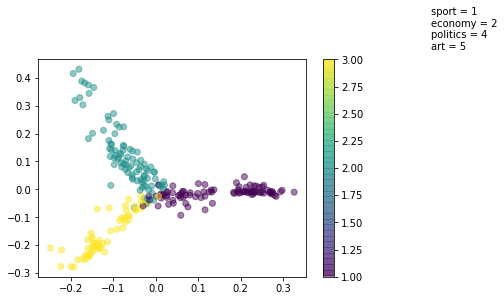

In [ ]:

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y,alpha = 0.5)
plt.text(0.65,0.5,"sport = 1\neconomy = 2\npolitics = 4\nart = 5")
plt.colorbar()

In [ ]:
############   MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

random_state = 0
cls = MiniBatchKMeans(n_clusters=4,random_state=random_state)
cls.fit(x)

cls.predict(x)

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

Text(0.5, 1.0, 'MiniBatchKMeans Method')

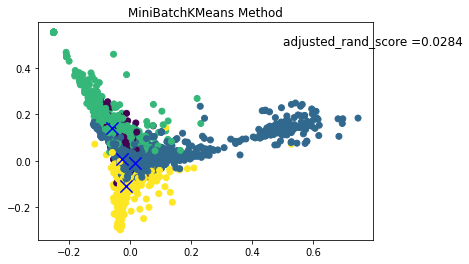

In [ ]:
########plotting MiniBatchKMeans
# from sklearn.metrics import silhouette_score
# score = silhouette_score(x, labels=cls.predict(x))

labels_true = y
labels_pred = cls.predict(x)
score = metrics.adjusted_rand_score(labels_true, labels_pred)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(x))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.text(0.5,0.5,'adjusted_rand_score =' + str(round(score,4)),fontsize = 12)

plt.title('MiniBatchKMeans Method')

In [ ]:
########## DBSCAN
from sklearn.cluster import DBSCAN

random_state = 0
cls = DBSCAN(eps = 0.001)
cls.fit(x)

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())


Text(0.5, 1.0, 'DBSCAN Method')

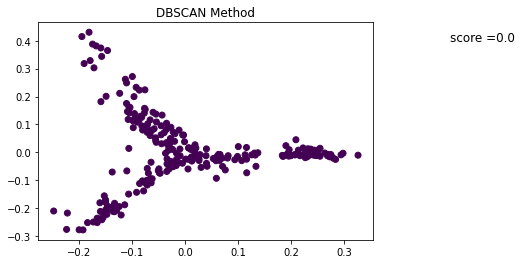

In [ ]:
########plotting DBSCAN
# from sklearn.metrics import silhouette_score
# score = silhouette_score(x, labels=cls.labels_)

labels_true = y
labels_pred = cls.labels_
score = metrics.adjusted_rand_score(labels_true, labels_pred)


plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.labels_)
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('DBSCAN Method')

In [13]:
########## KMeans
from sklearn.cluster import KMeans

random_state = 0
cls = KMeans(n_clusters=430)
cls.fit(x)

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())

Text(0.5, 1.0, 'KMeans Method')

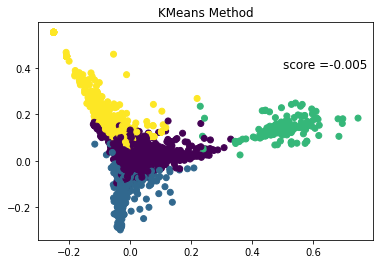

In [ ]:
########plotting KMeans
# from sklearn.metrics import silhouette_score
# score = silhouette_score(x, labels=cls.labels_)

labels_true = y
labels_pred = cls.labels_
score = metrics.adjusted_rand_score(labels_true, labels_pred)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.labels_)
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('KMeans Method')


In [ ]:
########## GaussianMixture Method
from sklearn.mixture import GaussianMixture
cls = GaussianMixture( n_components=4 )
X = x.todense()
cls.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5, 1.0, 'GaussianMixture Method')

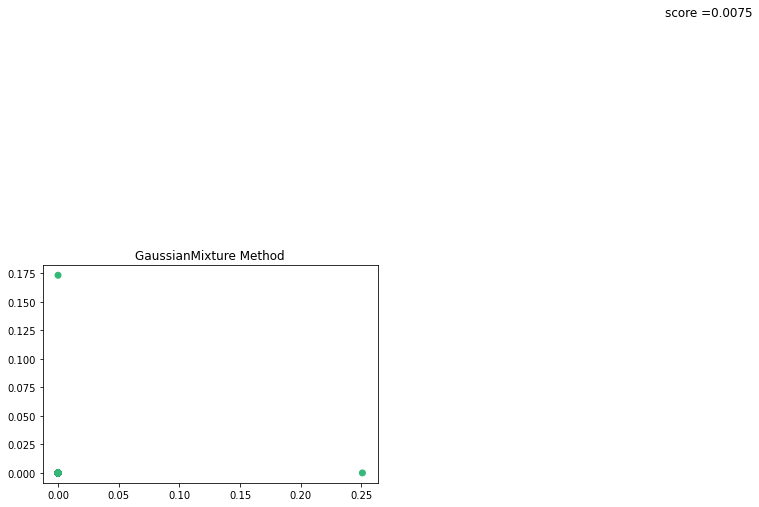

In [ ]:
########plotting GaussianMixture
from sklearn.metrics import silhouette_score
score = silhouette_score(x, labels=cls.predict(X))

plt.scatter([X[:,0]],[X[:,1]], c=cls.predict(X))
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)

plt.title('GaussianMixture Method')

In [ ]:
############ Birch method!!!!!!!!!!!!!!!!!
from sklearn.cluster import Birch
cls = Birch(n_clusters=4, threshold=0.05)
cls.fit(x)

labels = cls.predict(x)

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())

In [ ]:
##########plotting Birch
# from sklearn.metrics import silhouette_score
# score = silhouette_score(x, labels=cls.predict(X))
labels_true = y
labels_pred = cls.predict(X)
score = metrics.adjusted_rand_score(labels_true, labels_pred)



plt.scatter(reduced_features[:,0], reduced_features[:,1] ,c=labels, alpha=0.7)
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('Birch Method')

In [ ]:
############## AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

cls =AgglomerativeClustering(n_clusters=4)

pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(x.toarray())

cls.fit(reduced_features)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

Text(0.5, 1.0, 'AgglomerativeClustering Method')

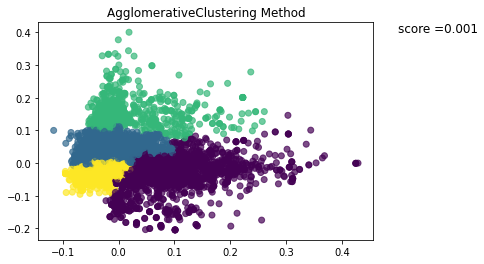

In [ ]:
######### plotting AgglomerativeClustering
from sklearn.metrics import silhouette_score
score = silhouette_score(x, labels=cls.labels_)

plt.scatter(reduced_features[:,0], reduced_features[:,1] ,c=cls.labels_, alpha=0.7)
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('AgglomerativeClustering Method')

In [ ]:
############# SpectralClustering Method
from sklearn.cluster import SpectralClustering
cls =SpectralClustering(n_clusters=4,affinity='nearest_neighbors')

pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(x.toarray())

cls.fit(reduced_features)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=4,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=None)

Text(0.5, 1.0, 'SpectralClustering Method')

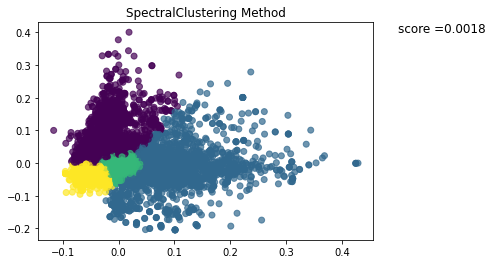

In [ ]:
######### plotting SpectralClustering
from sklearn.metrics import silhouette_score
score = silhouette_score(x, labels=cls.labels_)

plt.scatter(reduced_features[:,0], reduced_features[:,1] ,c=cls.labels_, alpha=0.7)
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('SpectralClustering Method')

In [ ]:
########## affinity propagation 
from sklearn.cluster import AffinityPropagation

random_state = 0
cls = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean')
cls.fit(x.toarray())

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

Text(0.5, 1.0, 'Affinity Propagation Method')

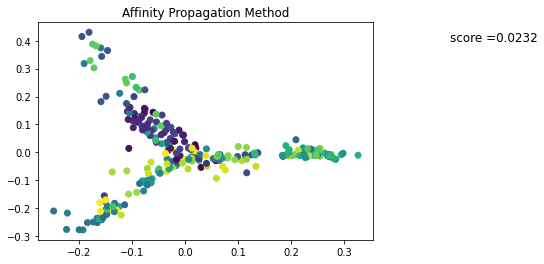

In [ ]:
########plotting Affinity propagation
from sklearn.metrics import silhouette_score
score = silhouette_score(x, labels=cls.labels_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.labels_)
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('Affinity Propagation Method')

In [ ]:
############   mean shift
from sklearn.cluster import MeanShift

cls =MeanShift( min_bin_freq=-1, cluster_all=True, max_iter=300)
cls.fit(x.toarray())

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(x.toarray())
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [ ]:
########plotting mean shift
from sklearn.metrics import silhouette_score
score = silhouette_score(x, labels=cls.predict(x) )

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(x))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.text(0.5,0.4,'score =' + str(round(score,4)),fontsize = 12)
plt.title('Mean Shift Method')

ValueError: ignored